___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [117]:
df = pd.read_csv("Frozen_Dessert_Production.csv",index_col='DATE', parse_dates = True)
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [119]:
df["Production"]= df['IPN31152N']
df = df.drop("IPN31152N",axis=1)
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


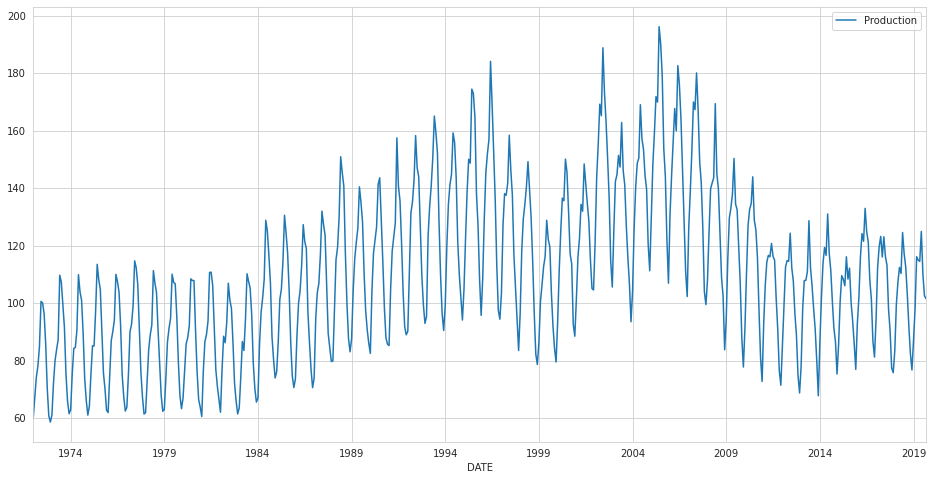

In [121]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [122]:
len(df)

573

In [123]:
test_size = 63

In [124]:
test_ind = len(df)- test_size
test_ind

510

In [125]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [126]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2014-02-01,101.731
2014-03-01,113.776
2014-04-01,119.353


In [127]:
test

,Production
DATE,
2014-07-01,117.272
2014-08-01,111.418
2014-09-01,100.617
2014-10-01,91.261
2014-11-01,86.572
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Scaling

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()

In [130]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [131]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [132]:
length = 15
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [133]:
len(generator)

495

In [134]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221],
         [0.09850931],
         [0.15590133]]]), array([[0.18358944]]))

In [135]:
X, y = generator[0]

In [136]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.
 0.01774221 0.09850931 0.15590133]
Predict this y: 
 [[0.18358944]]


# Modelling & Model Performance

## with "tanh" activation function

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [138]:
train_scaled.shape

(510, 1)

In [139]:
n_features = train_scaled.shape[1]

In [249]:
model = Sequential()
model.add(LSTM(300, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(150, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [250]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 15, 300)           362400    
                                                                 
 lstm_39 (LSTM)              (None, 150)               270600    
                                                                 
 dense_16 (Dense)            (None, 1)                 151       
                                                                 
Total params: 633,151
Trainable params: 633,151
Non-trainable params: 0
_________________________________________________________________


In [181]:
from tensorflow.keras.callbacks import EarlyStopping

In [192]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [193]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [194]:
len(validation_generator)

48

In [251]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
495/495 [==============================] - 22s 35ms/step - loss: 0.0186 - val_loss: 0.0041
Epoch 2/120
495/495 [==============================] - 17s 34ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 3/120
495/495 [==============================] - 16s 33ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 4/120
495/495 [==============================] - 17s 34ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 5/120
495/495 [==============================] - 17s 33ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 6/120
495/495 [==============================] - 17s 34ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 7/120
495/495 [==============================] - 17s 34ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 8/120
495/495 [==============================] - 17s 35ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 9/120
495/495 [==============================] - 17s 34ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 10/120
495/495 [==============================] - 17s 34ms/step - l

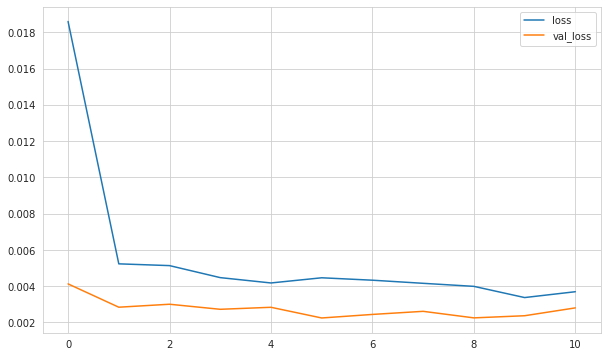

In [252]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [149]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [253]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [254]:
predictions_scaled

[array([0.4613801], dtype=float32),
 array([0.37743866], dtype=float32),
 array([0.2778756], dtype=float32),
 array([0.1936418], dtype=float32),
 array([0.15720546], dtype=float32),
 array([0.1800955], dtype=float32),
 array([0.24271393], dtype=float32),
 array([0.31470242], dtype=float32),
 array([0.3746712], dtype=float32),
 array([0.41189465], dtype=float32),
 array([0.42294443], dtype=float32),
 array([0.40432215], dtype=float32),
 array([0.35616982], dtype=float32),
 array([0.28711236], dtype=float32),
 array([0.21647237], dtype=float32)]

In [255]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6555230972495198 
mae: 0.04096432833572077 
mse: 0.002574201490531418 
rmse: 0.05073658926781951


### Inverse Transformation and Comparing

In [256]:
predictions = scaler.inverse_transform(predictions_scaled)

In [258]:
compare = test[:15]

In [259]:
compare['Predictions'] = predictions

In [260]:
compare

,Production,Predictions
DATE,,
2014-07-01,117.272,122.106
2014-08-01,111.418,110.563
2014-09-01,100.617,96.872
2014-10-01,91.261,85.288
2014-11-01,86.572,80.278
2014-12-01,75.375,83.425
2015-01-01,85.577,92.036
2015-02-01,100.558,101.936
2015-03-01,109.579,110.182


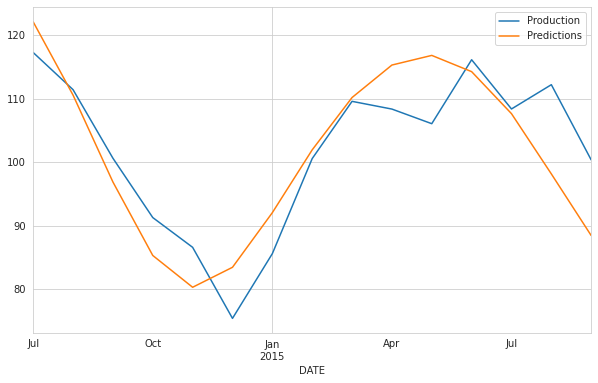

In [261]:
compare.plot()

## with "relu" activation function

In [158]:
n_features = train_scaled.shape[1]

In [159]:
model_relu = Sequential()
model_relu.add(LSTM(150, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model_relu.add(LSTM(50, activation = 'relu'))
model_relu.add(Dense(1))
model_relu.compile(optimizer = 'adam', loss = 'mse')

In [160]:
model_relu.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 15, 150)           91200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                40200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 131,451
Trainable params: 131,451
Non-trainable params: 0
_________________________________________________________________


In [161]:
from tensorflow.keras.callbacks import EarlyStopping

In [162]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [163]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [164]:
len(validation_generator)

48

In [165]:
model_relu.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
495/495 [==============================] - 11s 17ms/step - loss: 0.0294 - val_loss: 0.0120
Epoch 2/120
495/495 [==============================] - 8s 16ms/step - loss: 0.0197 - val_loss: 0.0082
Epoch 3/120
495/495 [==============================] - 8s 16ms/step - loss: 0.0121 - val_loss: 0.0124
Epoch 4/120
495/495 [==============================] - 8s 17ms/step - loss: 0.0087 - val_loss: 0.0040
Epoch 5/120
495/495 [==============================] - 8s 16ms/step - loss: 0.0081 - val_loss: 0.0086
Epoch 6/120
495/495 [==============================] - 8s 16ms/step - loss: 0.0080 - val_loss: 0.0047
Epoch 7/120
495/495 [==============================] - 8s 17ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 8/120
495/495 [==============================] - 8s 17ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 9/120
495/495 [==============================] - 8s 17ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 10/120
495/495 [==============================] - 8s 16ms/step - loss: 0.00

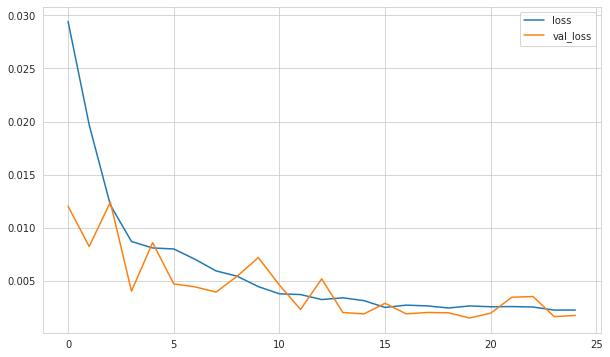

In [166]:
loss_df = pd.DataFrame(model_relu.history.history)
loss_df.plot()

### Evaluation on Test Data

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [168]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [169]:
predictions_scaled1 = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_relu.predict(current_batch)
    
    # store prediction
    predictions_scaled1.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [170]:
predictions_scaled1

[array([0.44614476], dtype=float32),
 array([0.3791172], dtype=float32),
 array([0.29934305], dtype=float32),
 array([0.23702651], dtype=float32),
 array([0.17134494], dtype=float32),
 array([0.1303888], dtype=float32),
 array([0.22453639], dtype=float32),
 array([0.3200094], dtype=float32),
 array([0.37546092], dtype=float32),
 array([0.41895157], dtype=float32),
 array([0.44932064], dtype=float32),
 array([0.46276817], dtype=float32),
 array([0.43259177], dtype=float32),
 array([0.37242827], dtype=float32),
 array([0.28886068], dtype=float32)]

In [171]:
eval_metrics(test_scaled[:length], predictions_scaled1)

r2_score: 0.7821042855154081 
mae: 0.02862001042604327 
mse: 0.0016282876109488678 
rmse: 0.04035204593262735


### Inverse Transformation and Comparing

In [172]:
predictions = scaler.inverse_transform(predictions_scaled1)

In [173]:
compare = test[:15]

In [174]:
compare['Predictions'] = predictions

In [175]:
compare

,Production,Predictions
DATE,,
2014-07-01,117.272,120.011
2014-08-01,111.418,110.794
2014-09-01,100.617,99.824
2014-10-01,91.261,91.254
2014-11-01,86.572,82.222
2014-12-01,75.375,76.590
2015-01-01,85.577,89.537
2015-02-01,100.558,102.666
2015-03-01,109.579,110.291


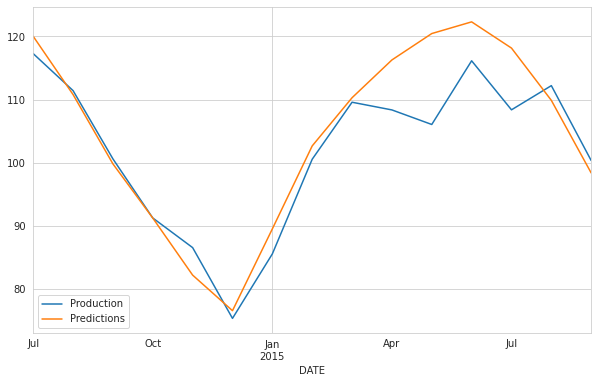

In [176]:
compare.plot()

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [262]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [263]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [264]:
len(df)

573

In [265]:
len(generator)

558

In [266]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_relu.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [267]:
forecast = scaler.inverse_transform(forecast)

In [268]:
forecast

array([[ 89.11681053],
       [ 80.71652797],
       [ 76.967552  ],
       [ 88.94718464],
       [100.52901814],
       [108.16833045],
       [113.08000192],
       [116.28946388],
       [116.12050191],
       [111.52914427],
       [103.02565384],
       [ 93.99495025],
       [ 87.56981341],
       [ 79.74092912],
       [ 76.27101212]])

In [269]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [270]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [271]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [272]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [273]:
forecast_df

,Forecast
2019-10-01,89.117
2019-11-01,80.717
2019-12-01,76.968
2020-01-01,88.947
2020-02-01,100.529
2020-03-01,108.168
2020-04-01,113.080
2020-05-01,116.289
2020-06-01,116.121
2020-07-01,111.529


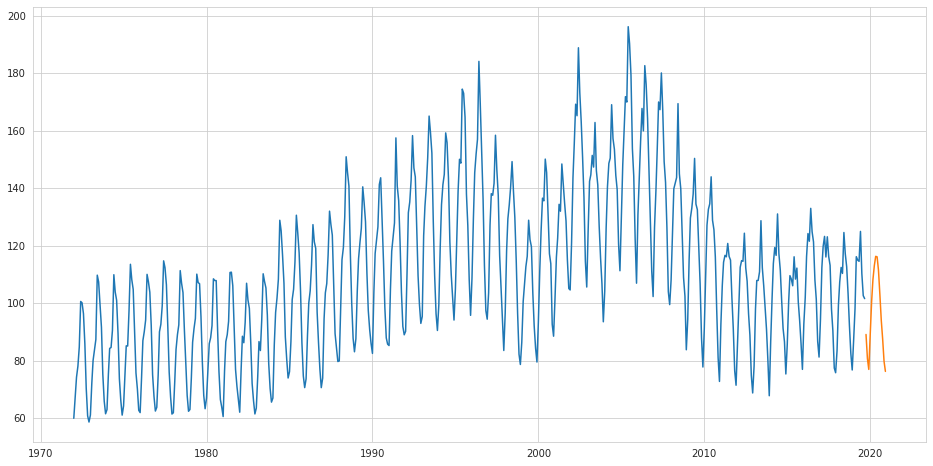

In [276]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [277]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

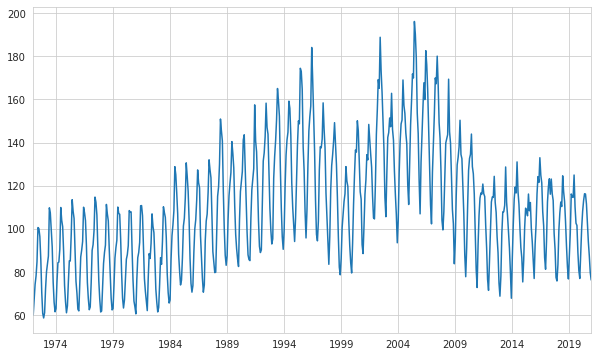

In [278]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___